In [92]:
#!pip install python-dotenv decorator==4.3 networkx
#!pip install pycoingecko
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import numpy as np
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
load_dotenv('../.env')

True

In [3]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [4]:
# coin_market = cg.get_coins_markets(vs_currency='usd')
# coin_market_df= pd.DataFrame(coin_market, columns=['id', 'current_price', 'high_24h' , 'low_24h'])
# coin_market_df.set_index('id', inplace=True)
# coin_market_df

In [5]:
btc_history = cg.get_coin_market_chart_by_id(id= 'bitcoin', vs_currency = 'usd', days = 'max')
btc_history_df = pd.DataFrame(btc_history)

In [6]:
def extract_volume(x):
    return x[0]
def extract_price(x):
    return x[1]

btc_history_df["volume"] = btc_history_df['prices'].apply(extract_volume)
btc_history_df["price"] = btc_history_df['prices'].apply(extract_price)
btc_history_df["market_cap"] = btc_history_df['market_caps'].apply(extract_price)
btc_history_df["total_volume"] = btc_history_df['total_volumes'].apply(extract_price)

In [7]:
btc_history_df = btc_history_df[['volume', 'price',
       'market_cap', 'total_volume']]
btc_history_df["date"] = pd.to_datetime(btc_history_df["volume"], unit="ms")
btc_history_df.set_index('date', inplace=True)
btc_history_df.drop(columns='volume', inplace=True)
btc_history_df.head()

,price,market_cap,total_volume
date,,,
2013-04-28,135.30,1.500518e+09,0.0
2013-04-29,141.96,1.575032e+09,0.0
2013-04-30,135.30,1.501657e+09,0.0
2013-05-01,117.00,1.298952e+09,0.0
2013-05-02,103.43,1.148668e+09,0.0


In [8]:
eth_history = cg.get_coin_market_chart_by_id(id= 'ethereum', vs_currency = 'usd', days = 'max')
eth_history_df = pd.DataFrame(eth_history)


In [9]:
eth_history_df["volume"] = eth_history_df['prices'].apply(extract_volume)
eth_history_df["price"] = eth_history_df['prices'].apply(extract_price)
eth_history_df["market_cap"] = eth_history_df['market_caps'].apply(extract_price)
eth_history_df["total_volume"] = eth_history_df['total_volumes'].apply(extract_price)

In [10]:
eth_history_df = eth_history_df[['volume', 'price',
       'market_cap', 'total_volume']]
eth_history_df["date"] = pd.to_datetime(eth_history_df["volume"], unit="ms")
eth_history_df.set_index('date', inplace=True)
eth_history_df.drop(columns='volume', inplace=True)
eth_history_df.head()

,price,market_cap,total_volume
date,,,
2015-08-07,2.831620,0.000000e+00,9.062200e+04
2015-08-08,1.330750,8.033948e+07,3.680700e+05
2015-08-10,0.687586,4.155631e+07,4.004641e+05
2015-08-11,1.067379,6.453901e+07,1.518998e+06
2015-08-12,1.256613,7.601326e+07,2.073893e+06


In [11]:
lte_history = cg.get_coin_market_chart_by_id(id= 'litecoin', vs_currency = 'usd', days = 'max')
lte_history_df = pd.DataFrame(lte_history)

In [12]:
lte_history_df["volume"] = lte_history_df['prices'].apply(extract_volume)
lte_history_df["price"] = lte_history_df['prices'].apply(extract_price)
lte_history_df["market_cap"] = lte_history_df['market_caps'].apply(extract_price)
lte_history_df["total_volume"] = lte_history_df['total_volumes'].apply(extract_price)

In [13]:
lte_history_df = lte_history_df[['volume', 'price',
       'market_cap', 'total_volume']]
lte_history_df["date"] = pd.to_datetime(lte_history_df["volume"], unit="ms")
lte_history_df.set_index('date', inplace=True)
lte_history_df.drop(columns='volume', inplace=True)
lte_history_df.head()

,price,market_cap,total_volume
date,,,
2013-04-28,4.29983,73773387.0,0.0
2013-04-29,4.35940,74936909.0,0.0
2013-04-30,4.18295,72037636.0,0.0
2013-05-01,3.64914,62957992.0,0.0
2013-05-02,3.38879,58565340.0,0.0


In [14]:
link_history = cg.get_coin_market_chart_by_id(id= 'chainlink', vs_currency = 'usd', days = 'max')
link_history_df = pd.DataFrame(link_history)

In [15]:
link_history_df["volume"] = link_history_df['prices'].apply(extract_volume)
link_history_df["price"] = link_history_df['prices'].apply(extract_price)
link_history_df["market_cap"] = link_history_df['market_caps'].apply(extract_price)
link_history_df["total_volume"] = link_history_df['total_volumes'].apply(extract_price)

In [16]:
link_history_df = link_history_df[['volume', 'price',
       'market_cap', 'total_volume']]
link_history_df["date"] = pd.to_datetime(link_history_df["volume"], unit="ms")
link_history_df.set_index('date', inplace=True)
link_history_df.drop(columns='volume', inplace=True)
link_history_df.head()

,price,market_cap,total_volume
date,,,
2017-11-09,0.225377,7.888183e+07,3.190026e+06
2017-11-10,0.189036,6.616275e+07,2.121175e+06
2017-11-11,0.181223,6.342793e+07,2.229298e+06
2017-11-12,0.170013,5.950462e+07,5.361146e+06
2017-11-13,0.180691,6.324186e+07,2.942234e+06


In [18]:
ada_history = cg.get_coin_market_chart_by_id(id= 'cardano', vs_currency = 'usd', days = 'max')
ada_history_df = pd.DataFrame(ada_history)
ada_history_df["volume"] = ada_history_df['prices'].apply(extract_volume)
ada_history_df["price"] = ada_history_df['prices'].apply(extract_price)
ada_history_df["market_cap"] = ada_history_df['market_caps'].apply(extract_price)
ada_history_df["total_volume"] = ada_history_df['total_volumes'].apply(extract_price)

In [19]:
ada_history_df = ada_history_df[['volume', 'price',
       'market_cap', 'total_volume']]
ada_history_df["date"] = pd.to_datetime(ada_history_df["volume"], unit="ms")
ada_history_df.set_index('date', inplace=True)
ada_history_df.drop(columns='volume', inplace=True)
ada_history_df.head()

,price,market_cap,total_volume
date,,,
2017-10-18,0.026845,6.960214e+08,2.351678e+06
2017-10-19,0.026830,6.956220e+08,2.815156e+06
2017-10-20,0.030300,7.855800e+08,8.883473e+06
2017-10-21,0.028588,7.412021e+08,5.308857e+06
2017-10-22,0.027796,7.206698e+08,2.901876e+06


In [20]:
to_merge_dict = {
    'BTC': btc_history_df , 'ETH': eth_history_df,
    'LTE':lte_history_df,'LINK':link_history_df, 'ADA':ada_history_df }

In [21]:
#Coin Merged DataFrame
merged_coin_df = pd.concat(to_merge_dict.values(), keys=to_merge_dict.keys(), axis=1, join='inner')
merged_coin_df.tail()

BTC                                      ETH  \
                   price    market_cap  total_volume        price   
date                                                                
2021-10-11  54711.869597  1.030788e+12  3.857927e+10  3431.019307   
2021-10-12  57572.510856  1.084736e+12  4.191348e+10  3537.840087   
2021-10-13  56335.035461  1.061830e+12  4.002138e+10  3498.105292   
2021-10-14  57487.985880  1.083366e+12  4.121695e+10  3605.650334   
2021-10-15  57452.431785  1.082900e+12  3.599460e+10  3794.516888   

                                               LTE                \
              market_cap  total_volume       price    market_cap   
date                                                               
2021-10-11  4.047651e+11  1.810661e+10  175.434910  1.205611e+10   
2021-10-12  4.151592e+11  2.042441e+10  179.310642  1.225476e+10   
2021-10-13  4.125796e+11  2.020765e+10  172.387123  1.184930e+10   
2021-10-14  4.250776e+11  1.830089e+10  177.815385  1.222603e+10   
2021-10-15  4.470602e+11  2.167918e+10  180.360043  1.239908e+10   

                               LINK                                   ADA  \
            total_volume      price    market_cap  total_volume     price   
date                                                                        
2021-10-11  2.710453e+09  25.619595  1.173034e+10  7.829011e+08  2.196016   
2021-10-12  2.917835e+09  25.213361  1.149602e+10  8.532963e+08  2.174115   
2021-10-13  2.817716e+09  24.658670  1.130543e+10  9.951235e+08  2.117958   
2021-10-14  2.522300e+09  25.526491  1.167714e+10  1.044764e+09  2.189331   
2021-10-15  2.442709e+09  26.678907  1.219655e+10  1.360412e+09  2.174487   

                                        
              market_cap  total_volume  
date                                    
2021-10-11  7.029793e+10  1.430279e+09  
2021-10-12  6.944329e+10  1.823097e+09  
2021-10-13  6.795550e+10  2.149639e+09  
2021-10-14  7.019715e+10  1.877292e+09  
2021-10-15  6.972897e+10  1.599893e+09

In [22]:
merged_coin_df.to_json('./Resources/crypto_data.json')

In [23]:
#Alpaca Keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [24]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [25]:
aapl_data = api.get_barset('AAPL',timeframe='1D', limit=1000,).df
aapl_data.tail()

AAPL                                       
                             open     high       low     close    volume
time                                                                    
2021-10-11 00:00:00-04:00  142.30  144.810  141.8100  142.8000  55706039
2021-10-12 00:00:00-04:00  143.23  143.250  141.0401  141.4600  57465598
2021-10-13 00:00:00-04:00  141.20  141.400  139.2000  140.9600  66616125
2021-10-14 00:00:00-04:00  142.09  143.880  141.5100  143.7554  55481541
2021-10-15 00:00:00-04:00  143.72  144.895  143.5100  144.8300  58199725

In [26]:
amzn_data = api.get_barset('AMZN',timeframe='1D', limit=1000,).df
amzn_data.head()

AMZN                                     
                              open     high      low    close    volume
time                                                                   
2017-10-26 00:00:00-04:00   980.33   982.90   968.55   972.54   2373669
2017-10-27 00:00:00-04:00  1057.03  1105.58  1050.55  1100.99  11137045
2017-10-30 00:00:00-04:00  1095.42  1122.79  1093.56  1110.85   4459741
2017-10-31 00:00:00-04:00  1109.00  1110.54  1101.12  1105.67   2289196
2017-11-01 00:00:00-04:00  1105.40  1108.97  1096.74  1103.50   2493594

In [27]:
ba_data = api.get_barset('BA',timeframe='1D', limit=1000,).df
ba_data.head()

BA                                    
                             open      high     low    close   volume
time                                                                 
2017-10-26 00:00:00-04:00  259.72  261.4400  257.31  259.270  2631747
2017-10-27 00:00:00-04:00  258.26  259.4994  255.80  256.310  1955905
2017-10-30 00:00:00-04:00  255.45  260.4100  255.29  259.240  2151914
2017-10-31 00:00:00-04:00  259.34  259.9300  257.47  257.990  1710205
2017-11-01 00:00:00-04:00  258.29  259.4100  256.24  258.515  1924146

In [28]:
nvda_data = api.get_barset('NVDA',timeframe='1D', limit=1000,).df
nvda_data.head()

NVDA                                    
                             open      high     low   close    volume
time                                                                 
2017-10-26 00:00:00-04:00  194.91  196.1600  193.81  195.59   6727585
2017-10-27 00:00:00-04:00  197.79  201.8700  196.75  201.75  12112237
2017-10-30 00:00:00-04:00  201.86  206.0899  201.22  203.76  10639517
2017-10-31 00:00:00-04:00  205.10  207.8900  204.90  206.75   8234024
2017-11-01 00:00:00-04:00  209.35  209.9700  204.60  207.20  10623453

In [29]:
brk_data = api.get_barset('BRK.A',timeframe='1D', limit=1000,).df
brk_data.head()

BRK.A                                      
                               open      high        low     close volume
time                                                                     
2017-10-03 00:00:00-04:00  278200.0  279660.0  277000.00  278630.0    214
2017-10-04 00:00:00-04:00  279200.0  279960.0  278384.84  278670.0    147
2017-10-05 00:00:00-04:00  279350.0  282000.0  278780.00  280360.0    305
2017-10-06 00:00:00-04:00  281030.0  281180.0  279280.00  281000.0    197
2017-10-09 00:00:00-04:00  281460.0  281700.0  280000.00  281160.0    123

In [30]:
gs_data = api.get_barset('GS',timeframe='1D', limit=1000,).df
gs_data.head()

GS                                 
                             open    high     low   close   volume
time                                                              
2017-10-26 00:00:00-04:00  242.33  244.00  241.53  241.72  1430800
2017-10-27 00:00:00-04:00  240.85  242.44  239.67  241.77  1354379
2017-10-30 00:00:00-04:00  240.10  242.59  239.53  240.86  1324530
2017-10-31 00:00:00-04:00  240.68  244.18  240.63  242.55  1962590
2017-11-01 00:00:00-04:00  243.89  247.40  242.91  244.29  2326966

In [31]:
cop_data = api.get_barset('COP',timeframe='1D', limit=1000,).df
cop_data.head()

COP                               
                            open   high     low  close   volume
time                                                           
2017-10-26 00:00:00-04:00  50.39  51.77  49.790  51.45  6276649
2017-10-27 00:00:00-04:00  51.16  52.23  50.200  51.21  6605795
2017-10-30 00:00:00-04:00  51.39  51.80  50.885  51.38  5274061
2017-10-31 00:00:00-04:00  51.32  51.61  51.020  51.15  4697595
2017-11-01 00:00:00-04:00  51.81  52.28  51.430  52.09  5148064

In [32]:
gild_data = api.get_barset('GILD',timeframe='1D', limit=1000,).df
gild_data.head()

GILD                                
                            open   high     low  close    volume
time                                                            
2017-10-26 00:00:00-04:00  78.44  79.50  77.000  77.84   9619233
2017-10-27 00:00:00-04:00  75.01  77.20  72.760  77.05  18999697
2017-10-30 00:00:00-04:00  76.10  76.93  75.250  75.98   9373807
2017-10-31 00:00:00-04:00  75.83  76.39  74.725  74.97   6716855
2017-11-01 00:00:00-04:00  74.69  75.85  74.220  74.84   7326593

In [33]:
ccoi_data = api.get_barset('CCOI',timeframe='1D', limit=1000,).df
ccoi_data.head()

CCOI                              
                            open   high     low  close  volume
time                                                          
2017-10-24 00:00:00-04:00  49.65  50.10  49.200  49.90  158656
2017-10-25 00:00:00-04:00  50.15  51.00  49.180  49.33  190010
2017-10-26 00:00:00-04:00  49.42  51.60  49.130  51.45  138453
2017-10-27 00:00:00-04:00  51.45  52.75  51.450  52.75  218586
2017-10-30 00:00:00-04:00  52.55  52.55  51.675  52.40  291054

In [34]:
proc_data = api.get_barset('PG',timeframe='1D', limit=1000,).df
proc_data.head()

PG                              
                            open   high    low  close   volume
time                                                          
2017-10-26 00:00:00-04:00  87.19  87.77  87.10  87.49  4597174
2017-10-27 00:00:00-04:00  87.53  87.53  86.45  87.03  5698218
2017-10-30 00:00:00-04:00  86.91  87.08  86.16  86.28  4220729
2017-10-31 00:00:00-04:00  86.49  86.50  85.72  86.33  4164033
2017-11-01 00:00:00-04:00  86.33  87.14  86.11  86.89  3832084

In [35]:
# aapl_data.dropna(inplace=True)
# amzn_data.dropna(inplace=True)
# ba_data.dropna(inplace=True)
# nvda_data.dropna(inplace=True)
# brk_data.dropna(inplace=True)
# gs_data.dropna(inplace=True)
# cop_data.dropna(inplace=True) 
# gild_data.dropna(inplace=True)
# ccoi_data.dropna(inplace=True)
# proc_data.dropna(inplace=True)

In [36]:
merged_stock_df= pd.concat([
    aapl_data, amzn_data, ba_data, nvda_data, brk_data,
    gs_data, cop_data, gild_data, ccoi_data, proc_data], axis='columns', join='inner')
#merged_stock_df = pd.concat(to_merge_dict.values())
#merged_stock_df.dropna(inplace=True)
merged_stock_df.head()

AAPL                                      \
                             open      high     low   close    volume   
time                                                                    
2017-10-26 00:00:00-04:00  157.23  157.8295  156.78  157.42  12374254   
2017-10-27 00:00:00-04:00  159.29  163.6000  158.70  163.03  36735155   
2017-10-30 00:00:00-04:00  163.89  168.0700  163.72  166.72  37107049   
2017-10-31 00:00:00-04:00  167.90  169.6499  166.94  169.05  28536890   
2017-11-01 00:00:00-04:00  169.87  169.9400  165.61  166.87  27873344   

                              AMZN                                       ...  \
                              open     high      low    close    volume  ...   
time                                                                     ...   
2017-10-26 00:00:00-04:00   980.33   982.90   968.55   972.54   2373669  ...   
2017-10-27 00:00:00-04:00  1057.03  1105.58  1050.55  1100.99  11137045  ...   
2017-10-30 00:00:00-04:00  1095.42  1122.79  1093.56  1110.85   4459741  ...   
2017-10-31 00:00:00-04:00  1109.00  1110.54  1101.12  1105.67   2289196  ...   
2017-11-01 00:00:00-04:00  1105.40  1108.97  1096.74  1103.50   2493594  ...   

                            CCOI                                    PG         \
                            open   high     low   close  volume   open   high   
time                                                                            
2017-10-26 00:00:00-04:00  49.42  51.60  49.130  51.450  138453  87.19  87.77   
2017-10-27 00:00:00-04:00  51.45  52.75  51.450  52.750  218586  87.53  87.53   
2017-10-30 00:00:00-04:00  52.55  52.55  51.675  52.400  291054  86.91  87.08   
2017-10-31 00:00:00-04:00  52.70  53.95  52.050  53.850  294315  86.49  86.50   
2017-11-01 00:00:00-04:00  54.30  54.85  53.225  53.525  532151  86.33  87.14   

                                                  
                             low  close   volume  
time                                              
2017-10-26 00:00:00-04:00  87.10  87.49  4597174  
2017-10-27 00:00:00-04:00  86.45  87.03  5698218  
2017-10-30 00:00:00-04:00  86.16  86.28  4220729  
2017-10-31 00:00:00-04:00  85.72  86.33  4164033  
2017-11-01 00:00:00-04:00  86.11  86.89  3832084  

[5 rows x 50 columns]

In [37]:
merged_stock_df.to_json('./Resources/stock_data.json')

In [38]:
#Bond Data
#iSHares 20 year plus treasury
bond_data = api.get_barset(['TLT', 'VOOG', 'VGLT', 'VMBS', 'IWF', 'IGSB', 'GOVT'],timeframe='1D', limit=1000,).df


In [39]:
bond_data.dropna(inplace=True)
bond_data.head()

GOVT                                    IGSB  \
                            open   high    low  close     volume    open   
time                                                                       
2017-10-25 00:00:00-04:00  25.07  25.10  25.05  25.09   575142.0  52.600   
2017-10-26 00:00:00-04:00  25.09  25.11  25.05  25.06   758379.0  52.585   
2017-10-27 00:00:00-04:00  25.07  25.12  25.07  25.12   813036.0  52.565   
2017-10-30 00:00:00-04:00  25.16  25.19  25.13  25.18   530322.0  52.635   
2017-10-31 00:00:00-04:00  25.19  25.19  25.15  25.15  1370121.0  52.635   

                                                             ...   VMBS  \
                             high     low   close    volume  ...   open   
time                                                         ...          
2017-10-25 00:00:00-04:00  52.605  52.570  52.595  413946.0  ...  52.56   
2017-10-26 00:00:00-04:00  52.605  52.570  52.588  534592.0  ...  52.64   
2017-10-27 00:00:00-04:00  52.630  52.565  52.605  446882.0  ...  52.56   
2017-10-30 00:00:00-04:00  52.640  52.605  52.613  789298.0  ...  52.72   
2017-10-31 00:00:00-04:00  52.635  52.605  52.615  553178.0  ...  52.73   

                                                               VOOG            \
                              high    low   close    volume    open      high   
time                                                                            
2017-10-25 00:00:00-04:00  52.8600  52.53  52.570  404450.0  131.26  131.4175   
2017-10-26 00:00:00-04:00  52.6411  52.52  52.520  255541.0  131.04  131.2200   
2017-10-27 00:00:00-04:00  52.6400  52.51  52.620  318618.0  132.04  133.1400   
2017-10-30 00:00:00-04:00  52.7600  52.69  52.750  311670.0  132.99  133.1500   
2017-10-31 00:00:00-04:00  52.7600  52.70  52.701  315803.0  133.06  133.0769   

                                                      
                                low   close   volume  
time                                                  
2017-10-25 00:00:00-04:00  130.2600  130.94  35633.0  
2017-10-26 00:00:00-04:00  130.8400  131.01  27887.0  
2017-10-27 00:00:00-04:00  132.0400  132.97  40996.0  
2017-10-30 00:00:00-04:00  132.4410  132.86  36904.0  
2017-10-31 00:00:00-04:00  132.6507  132.91  34679.0  

[5 rows x 35 columns]

In [40]:
bond_data.to_json('./Resources/bond_data.json')

In [41]:
#Machine Learning for Investments
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [42]:
#Calcualtions for Daily Return which help with creating a target for ML
merged_stock_df.loc[:, ('AAPL', 'Daily_Returns')] = merged_stock_df['AAPL']['close'].pct_change()
merged_stock_df.loc[:,('AMZN','Daily_Returns')] = merged_stock_df['AMZN']['close'].pct_change()
merged_stock_df.loc[:,('BA','Daily_Returns')] = merged_stock_df['BA']['close'].pct_change()
merged_stock_df.loc[:,('NVDA','Daily_Returns')] = merged_stock_df['NVDA']['close'].pct_change()
merged_stock_df.loc[:,('BRK.A','Daily_Returns')] = merged_stock_df['BRK.A']['close'].pct_change()
merged_stock_df.loc[:,('GS','Daily_Returns')] = merged_stock_df['GS']['close'].pct_change()
merged_stock_df.loc[:,('COP','Daily_Returns')] = merged_stock_df['COP']['close'].pct_change()
merged_stock_df.loc[:,('GILD','Daily_Returns')] = merged_stock_df['GILD']['close'].pct_change()
merged_stock_df.loc[:,('CCOI','Daily_Returns')] = merged_stock_df['CCOI']['close'].pct_change()
merged_stock_df.loc[:,('PG','Daily_Returns')] =merged_stock_df['PG']['close'].pct_change()
merged_stock_return_df=  merged_stock_df.copy()
merged_stock_return_df.dropna(inplace=True)

In [43]:
merged_stock_return_df.loc[:, ('AAPL', 'Daily_Returns')] = merged_stock_df['AAPL']['close'].pct_change()
merged_stock_return_df.loc[:,('AMZN','Daily_Returns')] = merged_stock_df['AMZN']['close'].pct_change()
merged_stock_return_df.loc[:,('BA','Daily_Returns')] = merged_stock_df['BA']['close'].pct_change()
merged_stock_return_df.loc[:,('NVDA','Daily_Returns')] = merged_stock_df['NVDA']['close'].pct_change()
merged_stock_return_df.loc[:,('BRK.A','Daily_Returns')] = merged_stock_df['BRK.A']['close'].pct_change()
merged_stock_return_df.loc[:,('GS','Daily_Returns')] = merged_stock_df['GS']['close'].pct_change()
merged_stock_return_df.loc[:,('COP','Daily_Returns')] = merged_stock_df['COP']['close'].pct_change()
merged_stock_return_df.loc[:,('GILD','Daily_Returns')] = merged_stock_df['GILD']['close'].pct_change()
merged_stock_return_df.loc[:,('CCOI','Daily_Returns')] = merged_stock_df['CCOI']['close'].pct_change()
merged_stock_return_df.loc[:,('PG','Daily_Returns')] = merged_stock_df['PG']['close'].pct_change()

merged_stock_return_df.dropna(inplace=True)


In [44]:
# l = []
# for x in dict(merged_stock_df.columns):
#     l.append((x, 'close'))
# new_merged_stock_df = merged_stock_df[l]
#new_merged_stock_df.head()

In [45]:
zero_risk_df = pd.read_json('./Portfolio_Risks/zero_risk_portfolio.json')
zero_risk_modeling =zero_risk_df.copy()
zero_risk_modeling['GOVT_returns'] =zero_risk_df["('GOVT', 'close')"].pct_change()
zero_risk_modeling['IGSB_returns'] =zero_risk_df["('IGSB', 'close')"].pct_change()
zero_risk_modeling['IWF_returns'] =zero_risk_df["('IWF', 'close')"].pct_change()
zero_risk_modeling['TLT_returns'] =zero_risk_df["('TLT', 'close')"].pct_change()
zero_risk_modeling['VGLT_returns'] =zero_risk_df["('VGLT', 'close')"].pct_change()
zero_risk_modeling['VMBS_returns'] =zero_risk_df["('VMBS', 'close')"].pct_change()
zero_risk_modeling['VOOG_returns'] =zero_risk_df["('VOOG', 'close')"].pct_change()
zero_risk_modeling['sum_returns'] =zero_risk_modeling['GOVT_returns'] + zero_risk_modeling['IGSB_returns']+zero_risk_modeling['IWF_returns']+ zero_risk_modeling['TLT_returns']+ zero_risk_modeling['VGLT_returns']+zero_risk_modeling['VMBS_returns']+ zero_risk_modeling['VOOG_returns']
zero_risk_modeling.dropna(inplace=True)
zero_risk_modeling.head()

,"('GOVT', 'open')","('GOVT', 'high')","('GOVT', 'low')","('GOVT', 'close')","('GOVT', 'volume')","('IGSB', 'open')","('IGSB', 'high')","('IGSB', 'low')","('IGSB', 'close')","('IGSB', 'volume')",...,"('VOOG', 'close')","('VOOG', 'volume')",GOVT_returns,IGSB_returns,IWF_returns,TLT_returns,VGLT_returns,VMBS_returns,VOOG_returns,sum_returns
2017-10-23 04:00:00,25.15,25.180,25.15,25.17,472528,52.625,52.640,52.601,52.635,856312,...,131.33,29681,0.000795,0.000570,-0.004664,0.001532,0.001702,0.001520,-0.004699,-0.003244
2017-10-24 04:00:00,25.11,25.135,25.10,25.12,636516,52.580,52.625,52.580,52.610,1359706,...,131.41,39516,-0.001986,-0.000475,0.001484,-0.006039,-0.005489,-0.001897,0.000609,-0.013793
2017-10-25 04:00:00,25.07,25.100,25.05,25.09,575142,52.600,52.605,52.570,52.595,413946,...,130.94,35633,-0.001194,-0.000285,-0.003977,-0.004860,-0.003942,-0.000950,-0.003577,-0.018786
2017-10-26 04:00:00,25.09,25.110,25.05,25.06,758379,52.585,52.605,52.570,52.588,534592,...,131.01,27887,-0.001196,-0.000133,0.001331,-0.003256,-0.003430,-0.000951,0.000535,-0.007100
2017-10-27 04:00:00,25.07,25.120,25.07,25.12,813036,52.565,52.630,52.565,52.605,446882,...,132.97,40996,0.002394,0.000323,0.015169,0.006288,0.006089,0.001904,0.014961,0.047129


In [64]:
zero_modeling = zero_risk_modeling[['GOVT_returns', 'IGSB_returns',
                                    'IWF_returns' , 'TLT_returns' , 'VGLT_returns' , 'VMBS_returns' , 'VOOG_returns'  ]]
cumulative_returns_zero = ((zero_modeling + 1).cumprod())-1
zero_modeling['Cummulative_returns']= cumulative_returns_zero.sum(axis=1)
zero_modeling['total_daily_returns'] =zero_risk_modeling['sum_returns'] 
zero_modeling.head()

<ipython-input-64-77eb50489a80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_modeling['Cummulative_returns']= cumulative_returns_zero.sum(axis=1)
<ipython-input-64-77eb50489a80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_modeling['total_daily_returns'] =zero_risk_modeling['sum_returns']


,GOVT_returns,IGSB_returns,IWF_returns,TLT_returns,VGLT_returns,VMBS_returns,VOOG_returns,Cummulative_returns,total_daily_returns
2017-10-23 04:00:00,0.000795,0.000570,-0.004664,0.001532,0.001702,0.001520,-0.004699,-0.003244,-0.003244
2017-10-24 04:00:00,-0.001986,-0.000475,0.001484,-0.006039,-0.005489,-0.001897,0.000609,-0.017069,-0.013793
2017-10-25 04:00:00,-0.001194,-0.000285,-0.003977,-0.004860,-0.003942,-0.000950,-0.003577,-0.035789,-0.018786
2017-10-26 04:00:00,-0.001196,-0.000133,0.001331,-0.003256,-0.003430,-0.000951,0.000535,-0.042842,-0.007100
2017-10-27 04:00:00,0.002394,0.000323,0.015169,0.006288,0.006089,0.001904,0.014961,0.003932,0.047129


In [47]:
year_trading_days= 252
avg_annual_zero = zero_modeling.mean() * year_trading_days

In [48]:
std_dev_zero = zero_modeling.std()* np.sqrt(year_trading_days)
std_dev_zero

GOVT_returns    0.045464
IGSB_returns    0.563975
IWF_returns     0.228052
TLT_returns     0.145253
VGLT_returns    0.139077
VMBS_returns    0.034469
VOOG_returns    0.222591
dtype: float64

In [50]:
sharpe_ratio = avg_annual_zero/std_dev_zero
sharpe_ratio

GOVT_returns    0.300020
IGSB_returns    0.241403
IWF_returns     0.962233
TLT_returns     0.331817
VGLT_returns    0.313398
VMBS_returns    0.078322
VOOG_returns    0.918575
dtype: float64

In [52]:
zero_ml = pd.DataFrame({'Annual_returns': avg_annual_zero,
                        'Standard_dev': std_dev_zero, 'Sharpe_ratio': sharpe_ratio})
zero_ml

,Annual_returns,Standard_dev,Sharpe_ratio
GOVT_returns,0.013640,0.045464,0.300020
IGSB_returns,0.136145,0.563975,0.241403
IWF_returns,0.219439,0.228052,0.962233
TLT_returns,0.048197,0.145253,0.331817
VGLT_returns,0.043586,0.139077,0.313398
VMBS_returns,0.002700,0.034469,0.078322
VOOG_returns,0.204467,0.222591,0.918575


In [89]:
#signal =[] 
# for x in abs(zero_modeling['total_daily_returns']):
#     if x > zero_modeling['Cummulative_returns'].all:
#         signal.append(1)
#     else:
#         signal.append(2)
# df['que'] = np.where((df['one'] >= df['two']) & (df['one'] <= df['three'])
#                      , df['one'], np.nan)
zero_risk_modeling['signal']= np.where((
    zero_modeling['total_daily_returns'] > zero_modeling['Cummulative_returns']), 0,1)
zero_risk_modeling.dropna(inplace=True)
def encodeCard(df):
    if df.lower() == "gain":
        return 1
    else:
        return 0


#zero_risk_modeling["signal"] = zero_risk_modeling["signal"]
zero_risk_modeling

,"('GOVT', 'open')","('GOVT', 'high')","('GOVT', 'low')","('GOVT', 'close')","('GOVT', 'volume')","('IGSB', 'open')","('IGSB', 'high')","('IGSB', 'low')","('IGSB', 'close')","('IGSB', 'volume')",...,GOVT_returns,IGSB_returns,IWF_returns,TLT_returns,VGLT_returns,VMBS_returns,VOOG_returns,sum_returns,Cummulative_returns,signal
2017-10-23 04:00:00,25.150,25.180,25.15,25.170,472528,52.625,52.640,52.601,52.635,856312,...,0.000795,0.000570,-0.004664,0.001532,0.001702,0.001520,-0.004699,-0.003244,6.996756,1
2017-10-24 04:00:00,25.110,25.135,25.10,25.120,636516,52.580,52.625,52.580,52.610,1359706,...,-0.001986,-0.000475,0.001484,-0.006039,-0.005489,-0.001897,0.000609,-0.013793,6.982931,0
2017-10-25 04:00:00,25.070,25.100,25.05,25.090,575142,52.600,52.605,52.570,52.595,413946,...,-0.001194,-0.000285,-0.003977,-0.004860,-0.003942,-0.000950,-0.003577,-0.018786,6.964211,0
2017-10-26 04:00:00,25.090,25.110,25.05,25.060,758379,52.585,52.605,52.570,52.588,534592,...,-0.001196,-0.000133,0.001331,-0.003256,-0.003430,-0.000951,0.000535,-0.007100,6.957158,0
2017-10-27 04:00:00,25.070,25.120,25.07,25.120,813036,52.565,52.630,52.565,52.605,446882,...,0.002394,0.000323,0.015169,0.006288,0.006089,0.001904,0.014961,0.047129,7.003932,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-06 04:00:00,26.490,26.520,26.48,26.500,3504197,54.540,54.560,54.530,54.560,1563571,...,0.000755,-0.000366,0.006411,0.005571,0.004470,-0.000188,0.006750,0.023403,9.601867,1
2021-10-07 04:00:00,26.440,26.450,26.40,26.410,3467051,54.550,54.560,54.520,54.530,1897730,...,-0.003396,-0.000550,0.010425,-0.010527,-0.009813,-0.001221,0.008729,-0.006354,9.613167,1
2021-10-08 04:00:00,26.390,26.390,26.34,26.360,5450632,54.520,54.530,54.470,54.470,975088,...,-0.001893,-0.001100,-0.004370,-0.006789,-0.006338,-0.001598,-0.003977,-0.026066,9.575733,1
2021-10-11 04:00:00,26.320,26.345,26.31,26.310,2092922,54.440,54.450,54.410,54.410,620056,...,-0.001897,-0.001102,-0.006189,-0.002819,-0.002667,-0.001130,-0.005545,-0.021349,9.540489,1


In [90]:
y = zero_risk_modeling['signal']
X = zero_risk_modeling.drop(columns='signal')

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [93]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [94]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [95]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [96]:
predictions = rf_model.predict(X_test_scaled)

In [97]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.99      0.98      0.99       232

    accuracy                           0.98       249
   macro avg       0.89      0.93      0.91       249
weighted avg       0.98      0.98      0.98       249



In [98]:
importances = rf_model.feature_importances_

In [99]:
important_features = zip(X.columns,rf_model.feature_importances_)

In [100]:
importances_df = pd.DataFrame(important_features)

# Rename the columns
importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})

# Set the index
importances_df = importances_df.set_index('Feature')

# Sort the dataframe by feature importance
importances_df = importances_df.sort_values(by='Importance',ascending=False)

<AxesSubplot:title={'center':'Feature Importance of no Risk Portfolio'}, ylabel='Feature'>

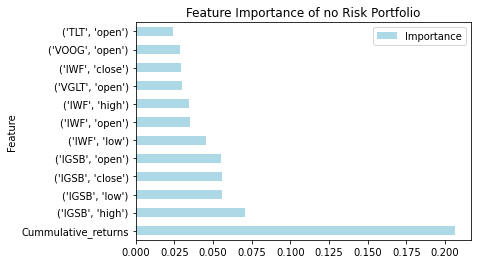

In [102]:
importances_df[0:12].plot(
    kind='barh', 
    color='lightblue', 
    title= 'Feature Importance of no Risk Portfolio', 
    legend=True)

In [103]:
low_risk_modeling = pd.read_json('./Portfolio_Risks/lower_risk_portfolio.json')

low_risk_modeling['GOVT_returns'] =low_risk_modeling["('GOVT', 'close')"].pct_change()
low_risk_modeling['IGSB_returns'] =low_risk_modeling["('IGSB', 'close')"].pct_change()
low_risk_modeling['IWF_returns'] =low_risk_modeling["('IWF', 'close')"].pct_change()
low_risk_modeling['TLT_returns'] =low_risk_modeling["('TLT', 'close')"].pct_change()
low_risk_modeling['VGLT_returns'] =low_risk_modeling["('VGLT', 'close')"].pct_change()
low_risk_modeling['VMBS_returns'] =low_risk_modeling["('VMBS', 'close')"].pct_change()
low_risk_modeling['VOOG_returns'] =low_risk_modeling["('VOOG', 'close')"].pct_change()
low_risk_modeling['AAPL_returns'] =low_risk_modeling["('AAPL', 'close')"].pct_change()
low_risk_modeling['AMZN_returns'] =low_risk_modeling["('AMZN', 'close')"].pct_change()
low_risk_modeling['total_daily_returns'] =low_risk_modeling['GOVT_returns'] + low_risk_modeling['AAPL_returns'] + low_risk_modeling['AMZN_returns'] + low_risk_modeling['IGSB_returns']+low_risk_modeling['IWF_returns']+ low_risk_modeling['TLT_returns']+ low_risk_modeling['VGLT_returns']+low_risk_modeling['VMBS_returns']+ low_risk_modeling['VOOG_returns']
low_risk_modeling.dropna(inplace=True)
low_risk_modeling.head()

,"('GOVT', 'open')","('GOVT', 'high')","('GOVT', 'low')","('GOVT', 'close')","('GOVT', 'volume')","('IGSB', 'open')","('IGSB', 'high')","('IGSB', 'low')","('IGSB', 'close')","('IGSB', 'volume')",...,GOVT_returns,IGSB_returns,IWF_returns,TLT_returns,VGLT_returns,VMBS_returns,VOOG_returns,AAPL_returns,AMZN_returns,total_daily_returns
2017-10-25 04:00:00,25.07,25.10,25.05,25.09,575142,52.600,52.605,52.570,52.595,413946,...,-0.001194,-0.000285,-0.003977,-0.004860,-0.003942,-0.000950,-0.003577,-0.004329,-0.003166,-0.026281
2017-10-26 04:00:00,25.09,25.11,25.05,25.06,758379,52.585,52.605,52.570,52.588,534592,...,-0.001196,-0.000133,0.001331,-0.003256,-0.003430,-0.000951,0.000535,0.006457,-0.000380,-0.001023
2017-10-27 04:00:00,25.07,25.12,25.07,25.12,813036,52.565,52.630,52.565,52.605,446882,...,0.002394,0.000323,0.015169,0.006288,0.006089,0.001904,0.014961,0.035637,0.132077,0.214843
2017-10-30 04:00:00,25.16,25.19,25.13,25.18,530322,52.635,52.640,52.605,52.613,789298,...,0.002389,0.000152,-0.001232,0.009901,0.009737,0.002471,-0.000827,0.022634,0.008956,0.054179
2017-10-31 04:00:00,25.19,25.19,25.15,25.15,1370121,52.635,52.635,52.605,52.615,553178,...,-0.001191,0.000038,0.002314,0.000161,-0.001042,-0.000929,0.000376,0.013976,-0.004663,0.009038


In [114]:
cumulative_returns_zero = ((low_risk_modeling + 1).cumprod())-1
low_risk_modeling['Cummulative_returns']= cumulative_returns_zero.sum(axis=1)
#low_risk_modeling['total_daily_returns'] =low_risk_modeling['sum_returns'] 
low_risk_modeling.head()

,"('GOVT', 'open')","('GOVT', 'high')","('GOVT', 'low')","('GOVT', 'close')","('GOVT', 'volume')","('IGSB', 'open')","('IGSB', 'high')","('IGSB', 'low')","('IGSB', 'close')","('IGSB', 'volume')",...,IWF_returns,TLT_returns,VGLT_returns,VMBS_returns,VOOG_returns,AAPL_returns,AMZN_returns,total_daily_returns,Cummulative_returns,signal
2017-10-25 04:00:00,25.07,25.10,25.05,25.09,575142,52.600,52.605,52.570,52.595,413946,...,-0.003977,-0.004860,-0.003942,-0.000950,-0.003577,-0.004329,-0.003166,-0.026281,8.823644e+07,1
2017-10-26 04:00:00,25.09,25.11,25.05,25.06,758379,52.585,52.605,52.570,52.588,534592,...,0.001331,-0.003256,-0.003430,-0.000951,0.000535,0.006457,-0.000380,-0.001023,4.521129e+29,1
2017-10-27 04:00:00,25.07,25.12,25.07,25.12,813036,52.565,52.630,52.565,52.605,446882,...,0.015169,0.006288,0.006089,0.001904,0.014961,0.035637,0.132077,0.214843,-2.540025e+70,0
2017-10-30 04:00:00,25.16,25.19,25.13,25.18,530322,52.635,52.640,52.605,52.613,789298,...,-0.001232,0.009901,0.009737,0.002471,-0.000827,0.022634,0.008956,0.054179,1.438243e+130,0
2017-10-31 04:00:00,25.19,25.19,25.15,25.15,1370121,52.635,52.635,52.605,52.615,553178,...,0.002314,0.000161,-0.001042,-0.000929,0.000376,0.013976,-0.004663,0.009038,2.326332e+207,1


In [115]:
# profit =[] 
# for x in low_risk_modeling['sum_returns']:
#     if x > 0:
#         profit.append('gain')
#     else:
#         profit.append('loss')
# low_risk_modeling['profit']= profit
# low_risk_modeling.dropna(inplace=True)


low_risk_modeling['signal']= np.where((
    low_risk_modeling['total_daily_returns'] > low_risk_modeling['Cummulative_returns']), 0,1)
low_risk_modeling.dropna(inplace=True)


low_risk_modeling.head()

,"('GOVT', 'open')","('GOVT', 'high')","('GOVT', 'low')","('GOVT', 'close')","('GOVT', 'volume')","('IGSB', 'open')","('IGSB', 'high')","('IGSB', 'low')","('IGSB', 'close')","('IGSB', 'volume')",...,IWF_returns,TLT_returns,VGLT_returns,VMBS_returns,VOOG_returns,AAPL_returns,AMZN_returns,total_daily_returns,Cummulative_returns,signal
2017-10-25 04:00:00,25.07,25.10,25.05,25.09,575142,52.600,52.605,52.570,52.595,413946,...,-0.003977,-0.004860,-0.003942,-0.000950,-0.003577,-0.004329,-0.003166,-0.026281,8.823644e+07,1
2017-10-26 04:00:00,25.09,25.11,25.05,25.06,758379,52.585,52.605,52.570,52.588,534592,...,0.001331,-0.003256,-0.003430,-0.000951,0.000535,0.006457,-0.000380,-0.001023,4.521129e+29,1
2017-10-27 04:00:00,25.07,25.12,25.07,25.12,813036,52.565,52.630,52.565,52.605,446882,...,0.015169,0.006288,0.006089,0.001904,0.014961,0.035637,0.132077,0.214843,-2.540025e+70,0
2017-10-30 04:00:00,25.16,25.19,25.13,25.18,530322,52.635,52.640,52.605,52.613,789298,...,-0.001232,0.009901,0.009737,0.002471,-0.000827,0.022634,0.008956,0.054179,1.438243e+130,1
2017-10-31 04:00:00,25.19,25.19,25.15,25.15,1370121,52.635,52.635,52.605,52.615,553178,...,0.002314,0.000161,-0.001042,-0.000929,0.000376,0.013976,-0.004663,0.009038,2.326332e+207,1


In [116]:
y = low_risk_modeling['signal']
X = low_risk_modeling.drop(columns='signal',)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [118]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\bowsk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

In [113]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)
rf_model = rf_model.fit(X_train_scaled, y_train)
predictions = rf_model.predict(X_test_scaled)

C:\Users\bowsk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
importances = rf_model.feature_importances_
important_features = zip(X.columns,rf_model.feature_importances_)
importances_df = pd.DataFrame(important_features)

In [ ]:
# Rename the columns
importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})

# Set the index
importances_df = importances_df.set_index('Feature')

# Sort the dataframe by feature importance
importances_df = importances_df.sort_values(by='Importance',ascending=False)

importances_df[0:12].plot(
    kind='barh', 
    color='blue', 
    title= 'Feature Importance', 
    legend=True)

In [119]:
low_med_modeling = pd.read_json('./Portfolio_Risks/low_medium_risk_portfolio.json')


low_med_modeling['IGSB_returns'] =low_med_modeling["('IGSB', 'close')"].pct_change()
low_med_modeling['TLT_returns'] =low_med_modeling["('TLT', 'close')"].pct_change()
low_med_modeling['VGLT_returns'] =low_med_modeling["('VGLT', 'close')"].pct_change()
low_med_modeling['VMBS_returns'] =low_med_modeling["('VMBS', 'close')"].pct_change()
low_med_modeling['VOOG_returns'] =low_med_modeling["('VOOG', 'close')"].pct_change()
low_med_modeling['AAPL_returns'] =low_med_modeling["('AAPL', 'close')"].pct_change()
low_med_modeling['AMZN_returns'] =low_med_modeling["('AMZN', 'close')"].pct_change()
low_med_modeling['BA_returns'] =low_med_modeling["('BA', 'close')"].pct_change()
low_med_modeling['NVDA_returns'] =low_med_modeling["('NVDA', 'close')"].pct_change()
low_med_modeling['GS_returns'] =low_med_modeling["('GS', 'close')"].pct_change()
low_med_modeling['sum_returns'] =low_med_modeling['AAPL_returns']+ low_med_modeling['GS_returns'] + low_med_modeling['BA_returns'] + low_med_modeling['NVDA_returns'] + low_med_modeling['IGSB_returns']+low_med_modeling['AMZN_returns']+ low_med_modeling['TLT_returns']+ low_med_modeling['VGLT_returns']+low_med_modeling['VMBS_returns']+ low_med_modeling['VOOG_returns']
# low_med_modeling.dropna(inplace=True)
low_med_modeling.head()

,"('IGSB', 'open')","('IGSB', 'high')","('IGSB', 'low')","('IGSB', 'close')","('IGSB', 'volume')","('TLT', 'open')","('TLT', 'high')","('TLT', 'low')","('TLT', 'close')","('TLT', 'volume')",...,TLT_returns,VGLT_returns,VMBS_returns,VOOG_returns,AAPL_returns,AMZN_returns,BA_returns,NVDA_returns,GS_returns,sum_returns
2017-10-24 04:00:00,52.580,52.625,52.580,52.610,1359706,123.37,123.690,123.15,123.45,5965628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-25 04:00:00,52.600,52.605,52.570,52.595,413946,122.53,122.980,122.42,122.85,7943533,...,-0.004860,-0.003942,-0.000950,-0.003577,-0.004329,-0.003166,-0.028679,-0.025318,-0.012905,-0.088011
2017-10-26 04:00:00,52.585,52.605,52.570,52.588,534592,123.06,123.060,122.43,122.45,7061633,...,-0.003256,-0.003430,-0.000951,0.000535,0.006457,-0.000380,0.003290,0.010070,0.000041,0.012243
2017-10-27 04:00:00,52.565,52.630,52.565,52.605,446882,122.94,123.325,122.75,123.22,7868465,...,0.006288,0.006089,0.001904,0.014961,0.035637,0.132077,-0.011417,0.031494,0.000207,0.217564
2017-10-30 04:00:00,52.635,52.640,52.605,52.613,789298,123.87,124.460,123.56,124.44,6502154,...,0.009901,0.009737,0.002471,-0.000827,0.022634,0.008956,0.011431,0.009963,-0.003764,0.070653


In [120]:
profit =[] 
for x in low_med_modeling['sum_returns']:
    if x > 0:
        profit.append('gain')
    else:
        profit.append('loss')
low_med_modeling['profit']= profit
low_med_modeling.dropna(inplace=True)

low_med_modeling["profit"] = low_med_modeling["profit"].apply(encodeCard)
low_med_modeling.head()

,"('IGSB', 'open')","('IGSB', 'high')","('IGSB', 'low')","('IGSB', 'close')","('IGSB', 'volume')","('TLT', 'open')","('TLT', 'high')","('TLT', 'low')","('TLT', 'close')","('TLT', 'volume')",...,VGLT_returns,VMBS_returns,VOOG_returns,AAPL_returns,AMZN_returns,BA_returns,NVDA_returns,GS_returns,sum_returns,profit
2017-10-25 04:00:00,52.600,52.605,52.570,52.595,413946,122.53,122.9800,122.42,122.85,7943533,...,-0.003942,-0.000950,-0.003577,-0.004329,-0.003166,-0.028679,-0.025318,-0.012905,-0.088011,0
2017-10-26 04:00:00,52.585,52.605,52.570,52.588,534592,123.06,123.0600,122.43,122.45,7061633,...,-0.003430,-0.000951,0.000535,0.006457,-0.000380,0.003290,0.010070,0.000041,0.012243,1
2017-10-27 04:00:00,52.565,52.630,52.565,52.605,446882,122.94,123.3250,122.75,123.22,7868465,...,0.006089,0.001904,0.014961,0.035637,0.132077,-0.011417,0.031494,0.000207,0.217564,1
2017-10-30 04:00:00,52.635,52.640,52.605,52.613,789298,123.87,124.4600,123.56,124.44,6502154,...,0.009737,0.002471,-0.000827,0.022634,0.008956,0.011431,0.009963,-0.003764,0.070653,1
2017-10-31 04:00:00,52.635,52.635,52.605,52.615,553178,124.53,124.6589,124.40,124.46,3898717,...,-0.001042,-0.000929,0.000376,0.013976,-0.004663,-0.004822,0.014674,0.007017,0.024785,1


In [121]:
y = low_med_modeling['profit']
X = low_med_modeling.drop(columns='profit')

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [123]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [124]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)
rf_model = rf_model.fit(X_train_scaled, y_train)
predictions = rf_model.predict(X_test_scaled)


importances = rf_model.feature_importances_
important_features = zip(X.columns,rf_model.feature_importances_)
importances_df = pd.DataFrame(important_features)

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature'>

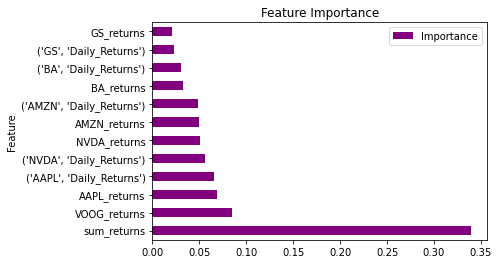

In [125]:
# Rename the columns
importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})

# Set the index
importances_df = importances_df.set_index('Feature')

# Sort the dataframe by feature importance
importances_df = importances_df.sort_values(by='Importance',ascending=False)

importances_df[0:12].plot(
    kind='barh', 
    color='purple', 
    title= 'Feature Importance', 
    legend=True)

In [126]:
# med_risk_modeling = pd.read_json('./Portfolio_Risks/medium_high_risk_portfolio.json')

with open('./Portfolio_Risks/medium_high_risk_portfolio.json') as json_data:
    data = json.load(json_data)
# med_risk_modeling = pd.DataFrame(data)
# # zero_risk_modeling['GOVT_returns'] =zero_risk_df["('GOVT', 'close')"].pct_change()
# # zero_risk_modeling['IGSB_returns'] =zero_risk_df["('IGSB', 'close')"].pct_change()
# # zero_risk_modeling['IWF_returns'] =zero_risk_df["('IWF', 'close')"].pct_change()
# # zero_risk_modeling['TLT_returns'] =zero_risk_df["('TLT', 'close')"].pct_change()
# # zero_risk_modeling['VGLT_returns'] =zero_risk_df["('VGLT', 'close')"].pct_change()
# # zero_risk_modeling['VMBS_returns'] =zero_risk_df["('VMBS', 'close')"].pct_change()
# # zero_risk_modeling['VOOG_returns'] =zero_risk_df["('VOOG', 'close')"].pct_change()
# # zero_risk_modeling['sum_returns'] =zero_risk_modeling['GOVT_returns'] + zero_risk_modeling['IGSB_returns']+zero_risk_modeling['IWF_returns']+ zero_risk_modeling['TLT_returns']+ zero_risk_modeling['VGLT_returns']+zero_risk_modeling['VMBS_returns']+ zero_risk_modeling['VOOG_returns']
# # zero_risk_modeling.dropna(inplace=True)
# med_risk_modeling.columns

In [127]:
data.keys()

dict_keys(['columns', 'index', 'data'])

In [128]:
y = [x.split("'") for x in data['columns']]
columns = [(x[1], x[3]) for x in y]

In [129]:
pd.DataFrame(data['data'], columns=columns)

,"(IGSB, open)","(IGSB, open)","(IGSB, open)","(IGSB, open)","(IGSB, open)","(IGSB, open)","(IGSB, open)","(IGSB, open)","(IGSB, open)","(IGSB, open)",...,"(GS, Daily_Returns)","(GS, Daily_Returns)","(GS, Daily_Returns)","(GS, Daily_Returns)","(GS, Daily_Returns)","(GS, Daily_Returns)","(GS, Daily_Returns)","(GS, Daily_Returns)","(GS, Daily_Returns)","(GS, Daily_Returns)"
0,52.580,52.580,52.580,52.580,52.580,52.580,52.580,52.580,52.580,52.580,...,0.011191,0.011191,0.011191,0.011191,0.011191,0.011191,0.011191,0.011191,0.011191,0.011191
1,52.600,52.600,52.600,52.600,52.600,52.600,52.600,52.600,52.600,52.600,...,-0.012905,-0.012905,-0.012905,-0.012905,-0.012905,-0.012905,-0.012905,-0.012905,-0.012905,-0.012905
2,52.585,52.585,52.585,52.585,52.585,52.585,52.585,52.585,52.585,52.585,...,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041
3,52.565,52.565,52.565,52.565,52.565,52.565,52.565,52.565,52.565,52.565,...,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207
4,52.635,52.635,52.635,52.635,52.635,52.635,52.635,52.635,52.635,52.635,...,-0.003764,-0.003764,-0.003764,-0.003764,-0.003764,-0.003764,-0.003764,-0.003764,-0.003764,-0.003764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,54.540,54.540,54.540,54.540,54.540,54.540,54.540,54.540,54.540,54.540,...,0.005831,0.005831,0.005831,0.005831,0.005831,0.005831,0.005831,0.005831,0.005831,0.005831
973,54.550,54.550,54.550,54.550,54.550,54.550,54.550,54.550,54.550,54.550,...,0.006931,0.006931,0.006931,0.006931,0.006931,0.006931,0.006931,0.006931,0.006931,0.006931
974,54.520,54.520,54.520,54.520,54.520,54.520,54.520,54.520,54.520,54.520,...,0.005374,0.005374,0.005374,0.005374,0.005374,0.005374,0.005374,0.005374,0.005374,0.005374
975,54.440,54.440,54.440,54.440,54.440,54.440,54.440,54.440,54.440,54.440,...,-0.019547,-0.019547,-0.019547,-0.019547,-0.019547,-0.019547,-0.019547,-0.019547,-0.019547,-0.019547


In [147]:
## Imports for Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [130]:
ba_data_modeling = ba_data['BA']
ba_data_modeling['daily_returns']= ba_data_modeling['close'].pct_change()
ba_data_modeling.head()

<ipython-input-130-f12d2aede007>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_data_modeling['daily_returns']= ba_data_modeling['close'].pct_change()


,open,high,low,close,volume,daily_returns
time,,,,,,
2017-10-26 00:00:00-04:00,259.72,261.4400,257.31,259.270,2631747,NaN
2017-10-27 00:00:00-04:00,258.26,259.4994,255.80,256.310,1955905,-0.011417
2017-10-30 00:00:00-04:00,255.45,260.4100,255.29,259.240,2151914,0.011431
2017-10-31 00:00:00-04:00,259.34,259.9300,257.47,257.990,1710205,-0.004822
2017-11-01 00:00:00-04:00,258.29,259.4100,256.24,258.515,1924146,0.002035


In [137]:
snp = api.get_barset('SPY', timeframe='1D', limit=1000).df

ba_data_modeling['SPY_returns']= snp['SPY']['close'].pct_change()


<ipython-input-137-03a91ea6b354>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_data_modeling['SPY_returns']= snp['SPY']['close'].pct_change()


In [140]:
# profit =[] 
# for x in ba_data_modeling['daily_returns']:
#     if x > ba_data_modeling['SPY_returns']:
#         profit.append('gain')
#     else:
#         profit.append('loss')
# ba_data_modeling['profit']= profit
# ba_data_modeling.dropna(inplace=True)
b


ba_data_modeling.head()

<ipython-input-140-06a28e0e475e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_data_modeling['signal'] = np.where((ba_data_modeling['daily_returns'] > ba_data_modeling['SPY_returns']), 0,1)


,open,high,low,close,volume,daily_returns,SPY_returns,signal
time,,,,,,,,
2017-10-26 00:00:00-04:00,259.72,261.4400,257.31,259.270,2631747,NaN,NaN,1
2017-10-27 00:00:00-04:00,258.26,259.4994,255.80,256.310,1955905,-0.011417,0.008177,1
2017-10-30 00:00:00-04:00,255.45,260.4100,255.29,259.240,2151914,0.011431,-0.003415,0
2017-10-31 00:00:00-04:00,259.34,259.9300,257.47,257.990,1710205,-0.004822,0.001207,1
2017-11-01 00:00:00-04:00,258.29,259.4100,256.24,258.515,1924146,0.002035,0.001556,0


In [141]:
# enc_ba = pd.get_dummies(ba_data_modeling)
y= ba_data_modeling['signal']
X= ba_data_modeling.drop(columns='signal')

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

In [143]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [144]:
display(X_train_scaled.shape)
display(y_train.shape)

(750, 7)

(750,)

In [148]:
neuron_ba = Sequential()

In [149]:
"""Multi Layer for Neural Network, we will have to constantly tweek these numbers.
For now we will use Three Layers and determine the activations as well"""
number_inputs = 7
number_hidden_nodes = 4

neuron_ba.add(Dense(input_dim=number_inputs, units=number_hidden_nodes, activation="sigmoid"))

#Second Layer
second_number_hidden_nodes = 6

neuron_ba.add(Dense(input_dim=number_inputs, units=second_number_hidden_nodes, activation="softmax"))

#Third Layer
third_number_hidden_nodes = 6

neuron_ba.add(Dense(input_dim=number_inputs, units=third_number_hidden_nodes, activation="tanh"))


In [153]:
outputs = 1
neuron_ba.add(Dense(units=outputs, activation="sigmoid"))


In [154]:
neuron_ba.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [155]:
#labels = y_train.unique()
#y_train = tf.one_hot(y_train, depth=len(labels))
#neuron.add(Dense(len(labels), activation='softmax'))

In [157]:
neuron_ba.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [158]:
model = neuron_ba.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
24/24 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4360
Epoch 2/150
24/24 [==============================] - 0s 563us/step - loss: nan - accuracy: 0.4400
Epoch 3/150
24/24 [==============================] - 0s 650us/step - loss: nan - accuracy: 0.4400
Epoch 4/150
24/24 [==============================] - 0s 563us/step - loss: nan - accuracy: 0.4400
Epoch 5/150
24/24 [==============================] - 0s 650us/step - loss: nan - accuracy: 0.4400
Epoch 6/150
24/24 [==============================] - 0s 607us/step - loss: nan - accuracy: 0.4400
Epoch 7/150
24/24 [==============================] - 0s 564us/step - loss: nan - accuracy: 0.4400
Epoch 8/150
24/24 [==============================] - 0s 650us/step - loss: nan - accuracy: 0.4400
Epoch 9/150
24/24 [==============================] - 0s 564us/step - loss: nan - accuracy: 0.4400
Epoch 10/150
24/24 [==============================] - 0s 737us/step - loss: nan - accuracy: 0.4400
Epoch 11/150
24/24 [=

In [159]:
ba_data_modeling.to_json('F_T_W/ba_fund.json')

In [161]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neuron_ba.evaluate(
    X_test_scaled, y_test, verbose=2
)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: nan - accuracy: 0.4640
Loss: nan, Accuracy: 0.46399998664855957


In [187]:
btc_hist = cg.get_coin_market_chart_by_id(id= 'bitcoin', vs_currency = 'usd', days = '1200')
btc_modeling = pd.DataFrame(btc_hist)
btc_modeling["volume"] = btc_modeling['prices'].apply(extract_volume)
btc_modeling["price"] = btc_modeling['prices'].apply(extract_price)
btc_modeling["market_cap"] = btc_modeling['market_caps'].apply(extract_price)
btc_modeling["total_volume"] = btc_modeling['total_volumes'].apply(extract_price)
btc_modeling = btc_modeling[['volume', 'price',
       'market_cap', 'total_volume']]
btc_modeling["date"] = pd.to_datetime(btc_modeling["volume"], unit="ms")
btc_modeling.set_index('date', inplace=True)
btc_modeling.drop(columns='volume', inplace=True)


btc_modeling['daily_returns']= btc_modeling['price'].pct_change()
btc_modeling.head()

,price,market_cap,total_volume,daily_returns
date,,,,
2018-07-05,6562.721737,1.124279e+11,3.111969e+09,NaN
2018-07-06,6537.740872,1.120110e+11,3.315115e+09,-0.003806
2018-07-07,6603.294704,1.131475e+11,4.742128e+09,0.010027
2018-07-08,6759.836089,1.158427e+11,6.047929e+09,0.023707
2018-07-09,6700.635479,1.148417e+11,5.015171e+09,-0.008758


In [188]:
ada_hist = cg.get_coin_market_chart_by_id(id= 'cardano', vs_currency = 'usd', days = '1200')
ada_modeling = pd.DataFrame(ada_hist)
ada_modeling["volume"] = ada_modeling['prices'].apply(extract_volume)
ada_modeling["price"] = ada_modeling['prices'].apply(extract_price)
ada_modeling["market_cap"] = ada_modeling['market_caps'].apply(extract_price)
ada_modeling["total_volume"] = ada_modeling['total_volumes'].apply(extract_price)
ada_modeling = ada_modeling[['volume', 'price',
       'market_cap', 'total_volume']]
ada_modeling["date"] = pd.to_datetime(ada_modeling["volume"], unit="ms")
ada_modeling.set_index('date', inplace=True)
ada_modeling.drop(columns='volume', inplace=True)


ada_modeling['daily_returns']= ada_modeling['price'].pct_change()
btc_history_df.head()

,price,market_cap,total_volume,daily_returns
date,,,,
2018-07-05,6562.721737,1.124279e+11,3.111969e+09,NaN
2018-07-06,6537.740872,1.120110e+11,3.315115e+09,-0.003806
2018-07-07,6603.294704,1.131475e+11,4.742128e+09,0.010027
2018-07-08,6759.836089,1.158427e+11,6.047929e+09,0.023707
2018-07-09,6700.635479,1.148417e+11,5.015171e+09,-0.008758


In [189]:
btc_history_df['price'].value_counts

<bound method IndexOpsMixin.value_counts of date
2018-07-05 00:00:00     6562.721737
2018-07-06 00:00:00     6537.740872
2018-07-07 00:00:00     6603.294704
2018-07-08 00:00:00     6759.836089
2018-07-09 00:00:00     6700.635479
                           ...     
2021-10-13 00:00:00    56335.035461
2021-10-14 00:00:00    57487.985880
2021-10-15 00:00:00    57452.431785
2021-10-16 00:00:00    61809.023944
2021-10-16 09:08:06    61748.382912
Name: price, Length: 1201, dtype: float64>

In [190]:
ada_modeling['price'].value_counts

<bound method IndexOpsMixin.value_counts of date
2018-07-05 00:00:00    0.150808
2018-07-06 00:00:00    0.147443
2018-07-07 00:00:00    0.145444
2018-07-08 00:00:00    0.148038
2018-07-09 00:00:00    0.145328
                         ...   
2021-10-13 00:00:00    2.117958
2021-10-14 00:00:00    2.189331
2021-10-15 00:00:00    2.174487
2021-10-16 00:00:00    2.225648
2021-10-16 09:08:35    2.225468
Name: price, Length: 1201, dtype: float64>

In [204]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()


#or if you have only numerical datatype then
encoder.fit_transform(btc_modeling['daily_returns'].astype(int))
encoder.fit_transform(ada_modeling['daily_returns'].astype(int))

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [206]:
# ada_modeling['daily_returns']= btc_history_df['price'].pct_change()
ada_modeling.dropna(inplace=True)
btc_modeling.dropna(inplace=True)
#ada_modeling['signal'] = np.where((ba_data_modeling['daily_returns'] > btc_modeling['daily_returns']), 0,1)
signal = []
for x in ada_modeling['daily_returns']:
    if x > btc_modeling['daily_returns']:
        signal.append(1)
    else:
        signal.append(0)

ada_modeling.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
y= ada_modeling['signal']
X= ada_modeling.drop(columns='signal')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_train_scaled_ada = X_scaler.transform(X_train)
X_test_scaled_ada = X_scaler.transform(X_test)

In [ ]:
display(X_train_scaled_ada.shape)
display(y_train.shape)

In [ ]:
"""Multi Layer for Neural Network, we will have to constantly tweek these numbers.
For now we will use Three Layers and determine the activations as well"""
number_inputs_cry = 4
number_hidden_nodes = 3
neuron = Sequential()
neuron.add(Dense(input_dim=number_inputs_cry, units=number_hidden_nodes, activation="relu"))

#Second Layer
second_number_hidden_nodes = 2

neuron.add(Dense(units=second_number_hidden_nodes, activation="relu"))

#Third Layer
third_number_hidden_nodes = 1

neuron.add(Dense(units=third_number_hidden_nodes, activation="relu"))

In [ ]:
outputs = 1
neuron.add(Dense(units=outputs, activation="sigmoid"))
neuron.summary()

In [ ]:
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model = neuron.fit(X_train_scaled_ada, y_train, epochs=150)

In [207]:
govt_modeling = bond_data['GOVT']
govt_modeling['daily_returns']= govt_modeling['close'].pct_change()
govt_modeling.head()

<ipython-input-207-6178b3ac8d53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  govt_modeling['daily_returns']= govt_modeling['close'].pct_change()


,open,high,low,close,volume,daily_returns
time,,,,,,
2017-10-25 00:00:00-04:00,25.07,25.10,25.05,25.09,575142.0,NaN
2017-10-26 00:00:00-04:00,25.09,25.11,25.05,25.06,758379.0,-0.001196
2017-10-27 00:00:00-04:00,25.07,25.12,25.07,25.12,813036.0,0.002394
2017-10-30 00:00:00-04:00,25.16,25.19,25.13,25.18,530322.0,0.002389
2017-10-31 00:00:00-04:00,25.19,25.19,25.15,25.15,1370121.0,-0.001191


In [208]:
govt_modeling['SPY_returns']= snp['SPY']['close'].pct_change()
govt_modeling['signal'] = np.where((govt_modeling['daily_returns'] > govt_modeling['SPY_returns']), 0,1)

govt_modeling.head()

<ipython-input-208-f7e24053fbc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  govt_modeling['SPY_returns']= snp['SPY']['close'].pct_change()
<ipython-input-208-f7e24053fbc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  govt_modeling['signal'] = np.where((govt_modeling['daily_returns'] > govt_modeling['SPY_returns']), 0,1)


,open,high,low,close,volume,daily_returns,SPY_returns,signal
time,,,,,,,,
2017-10-25 00:00:00-04:00,25.07,25.10,25.05,25.09,575142.0,NaN,NaN,1
2017-10-26 00:00:00-04:00,25.09,25.11,25.05,25.06,758379.0,-0.001196,NaN,1
2017-10-27 00:00:00-04:00,25.07,25.12,25.07,25.12,813036.0,0.002394,0.008177,1
2017-10-30 00:00:00-04:00,25.16,25.19,25.13,25.18,530322.0,0.002389,-0.003415,0
2017-10-31 00:00:00-04:00,25.19,25.19,25.15,25.15,1370121.0,-0.001191,0.001207,1


In [209]:
y= govt_modeling['signal']
X= govt_modeling.drop(columns='signal')

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

In [212]:
neuro_govt = Sequential()
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [214]:
"""Multi Layer for Neural Network, we will have to constantly tweek these numbers.
For now we will use Three Layers and determine the activations as well"""
number_inputs = 7
number_hidden_nodes = 4

neuro_govt.add(Dense(input_dim=number_inputs, units=number_hidden_nodes, activation="sigmoid"))

#Second Layer
second_number_hidden_nodes = 6

neuro_govt.add(Dense(units=second_number_hidden_nodes, activation="relu"))

#Third Layer
third_number_hidden_nodes = 6

neuro_govt.add(Dense(units=third_number_hidden_nodes, activation="tanh"))

In [216]:
outputs = 1
neuro_govt.add(Dense(units=outputs, activation="sigmoid"))
neuro_govt.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001FEF3A4AD30>>

In [218]:
neuro_govt.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model = neuro_govt.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
24/24 [==============================] - 0s 607us/step - loss: nan - accuracy: 0.4592
Epoch 2/150
24/24 [==============================] - 0s 561us/step - loss: nan - accuracy: 0.4444
Epoch 3/150
24/24 [==============================] - 0s 566us/step - loss: nan - accuracy: 0.4444
Epoch 4/150
24/24 [==============================] - 0s 607us/step - loss: nan - accuracy: 0.4444
Epoch 5/150
24/24 [==============================] - 0s 607us/step - loss: nan - accuracy: 0.4444
Epoch 6/150
24/24 [==============================] - 0s 607us/step - loss: nan - accuracy: 0.4444
Epoch 7/150
24/24 [==============================] - 0s 477us/step - loss: nan - accuracy: 0.4444
Epoch 8/150
24/24 [==============================] - 0s 565us/step - loss: nan - accuracy: 0.4444
Epoch 9/150
24/24 [==============================] - 0s 520us/step - loss: nan - accuracy: 0.4444
Epoch 10/150
24/24 [==============================] - 0s 520us/step - loss: nan - accuracy: 0.4444
Epoch 11/150
24/24 

In [219]:
model_loss, model_accuracy = neuro_govt.evaluate(
    X_test_scaled, y_test, verbose=2
)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: nan - accuracy: 0.4040
Loss: nan, Accuracy: 0.40400001406669617


In [220]:
govt_modeling.to_json('F_T_W/govt_fund.json')
ada_modeling.to_json('F_T_W/ada_fund.json')
btc_modeling.to_json('F_T_W/btc_fund.json')

In [ ]:
# new_merged_stock_df = merged_stock_df[l]
#     if x > 0:
#         print("profit")
#     else:
#         print("loss")

In [ ]:
#iShares 1-5 year Investment grade bond
# igsb_data = api.get_barset('IGSB',timeframe='1D', limit=1000,).df
# igsb_data.head()

In [ ]:
#iShares US Treasury Bond ETF
# govt_data = api.get_barset('GOVT',timeframe='1D', limit=1000,).df
# govt_data.head()